# Exercise 6

Step 1. Load the May 2020 Airline CSV file into a data frame.

In [1]:
# Step 1 Solution

import pandas as pd

flights = pd.read_csv("data/AirlineOnTime_May2020.csv")

flights.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,...,CANCELLED,DIVERTED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 31
0,2020,2,5,1,5,2020-05-01,NK,N629NK,ACY,MCO,...,0.0,0.0,125.0,852.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,2,5,4,1,2020-05-04,NK,N926NK,ACY,MCO,...,0.0,0.0,118.0,852.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,2,5,6,3,2020-05-06,NK,N926NK,ACY,MCO,...,0.0,0.0,124.0,852.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,2,5,8,5,2020-05-08,NK,N926NK,ACY,MCO,...,0.0,0.0,121.0,852.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,2,5,11,1,2020-05-11,NK,N607NK,ACY,MCO,...,0.0,0.0,125.0,852.0,NaN,NaN,NaN,NaN,NaN,NaN


Step 2. Count the number of flights for each origin airport. Sort the totals, and display the top 10 airports. Which origin airport had the most flights?

In [2]:
# Step 2 Solution

flights.groupby(["ORIGIN"]).size().sort_values(ascending=False).head(10)

ORIGIN
DFW    11154
DEN     8571
ATL     8328
CLT     8059
ORD     7239
LAS     4686
PHX     4283
SEA     4008
DTW     3905
IAH     3900
dtype: int64

Step 3. Which origin airport had the most cancellations?

In [3]:
# Step 3 Solution

display(flights[flights["CANCELLED"] == 1]["ORIGIN"].value_counts().head(1))

display(flights[flights["CANCELLED"] == 1.0].groupby("ORIGIN").size().sort_values(ascending=False).head(1))


LAS    729
Name: ORIGIN, dtype: int64

ORIGIN
LAS    729
dtype: int64

Step 4. Which origin airport had the highest percentage of cancellations in relation to its total number of flights?

In [4]:
# Step 4 Solution

canceled_flights = pd.DataFrame({
    "Fulfilled": flights[flights["CANCELLED"] == 0.0].groupby("ORIGIN").size(),
    "Cancelled": flights[flights["CANCELLED"] == 1.0].groupby("ORIGIN").size(),
    "Total": flights.groupby("ORIGIN").size(),
}).sort_values(by=["Cancelled"], ascending=False)

canceled_flights["Percent Cancelled"] = 100 * (canceled_flights["Cancelled"] / canceled_flights["Total"])

canceled_flights.sort_values(by=["Percent Cancelled"], ascending=False).head(10)

,Fulfilled,Cancelled,Total,Percent Cancelled
ORIGIN,,,,
BLI,NaN,120.0,120,100.000000
OGD,2.0,9.0,11,81.818182
PVU,21.0,58.0,79,73.417722
SCK,18.0,47.0,65,72.307692
USA,46.0,98.0,144,68.055556
SFB,391.0,510.0,901,56.603774
OWB,5.0,6.0,11,54.545455
SMX,7.0,8.0,15,53.333333
AVL,212.0,211.0,423,49.881797


Step 5. Chart the number of flights and cancellations per day, in May 2020, for ATL, LAS, DFW, and ORD. Using a pie chart show the number of canceled flights in relation to non-canceled flights for ATL, LAS, DFW, and ORD for May 2020. Draw one figure per airport, with each figure containing the daily chart and the monthly pie chart.

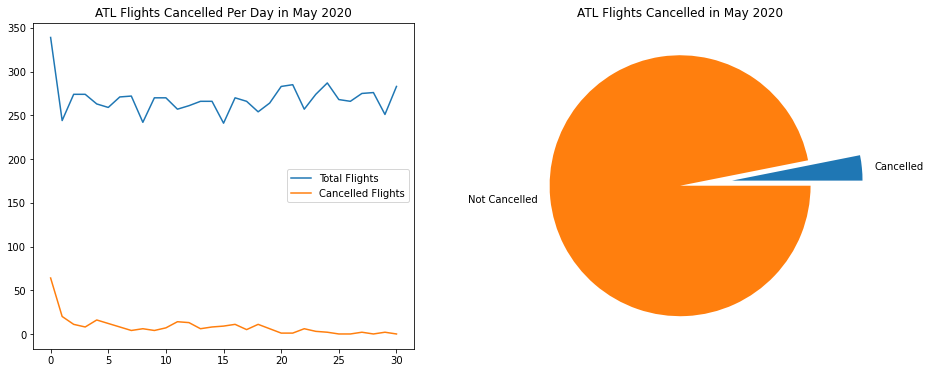

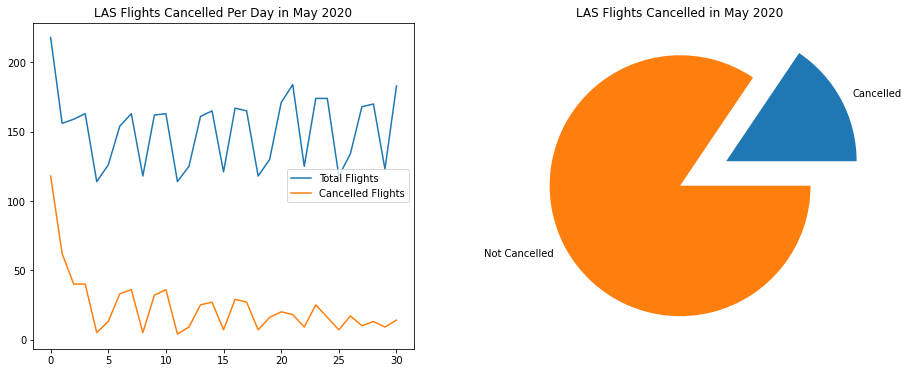

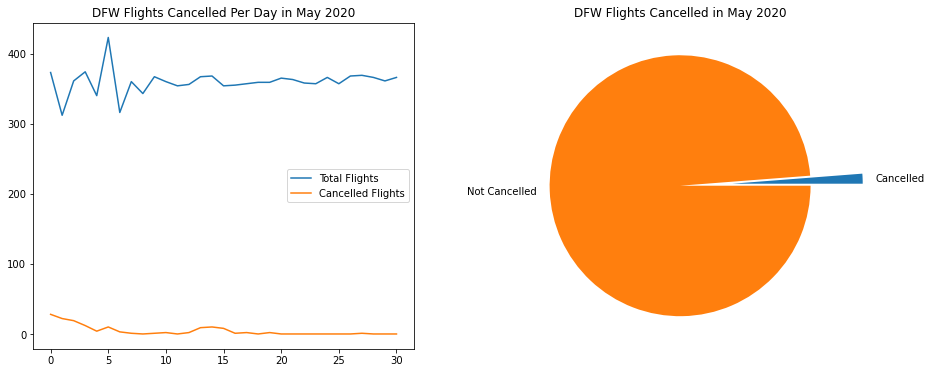

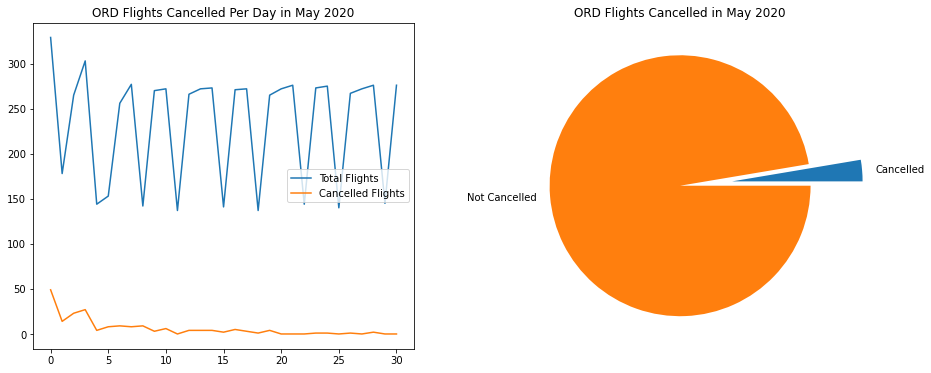

In [10]:
# Step 5 Solution

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

%matplotlib inline

airports = ["ATL", "LAS", "DFW", "ORD"]

for airport in airports:

    airport_daily_flights = flights[flights["ORIGIN"] == airport].groupby(by=["DAY_OF_MONTH"]).size()
    airport_daily_cancellations = flights[
        (flights["ORIGIN"] == airport) & (flights["CANCELLED"] == 1.0) ].groupby(by=["DAY_OF_MONTH"]).size()
    
    airport_daily_flights = airport_daily_flights.reindex(range(1,32), fill_value=0)
    airport_daily_cancellations = airport_daily_cancellations.reindex(range(1,32), fill_value=0)
    

    fig_1 = plt.figure(1, figsize=(15, 6))

    chart_1 = fig_1.add_subplot(121)
    chart_2 = fig_1.add_subplot(122)

    chart_1.plot(range(31), airport_daily_flights, label="Total Flights")
    chart_1.plot(range(31), airport_daily_cancellations, label="Cancelled Flights")

    chart_1.set_title(airport + " Flights Cancelled Per Day in May 2020")
    chart_1.xaxis.set_label("Day of the Month")
    chart_1.yaxis.set_label("Num of Flights")
    chart_1.legend(loc="center right")

    chart_2.pie([
        airport_daily_cancellations.sum(),
        airport_daily_flights.sum() - airport_daily_cancellations.sum()],
        labels=["Cancelled", "Not Cancelled"],
        explode = (0.4, 0))

    chart_2.set_title(airport + " Flights Cancelled in May 2020")


    plt.show()